In [0]:
Dataset: Walmart Stock Dataset
1.	Create a new dataframe with a column called HV Ratio that is the ratio of the High Price versus volume of stock traded for a day
2.	What day had the Peak High in Price?
3.	What is the mean of the Close column?
4.	What is the max and min of the Volume column?
5.	How many days was the Close lower than 60 dollars?
6.	What percentage of the time was the High greater than 80 dollars ?
7.	What is the Pearson correlation between High and Volume?
8.	What is the max High per year?
9.	What is the max High per year?
10.	Perform EDA

In [0]:
from pyspark.sql import SparkSession

In [0]:
sc=SparkSession.builder.appName('hack').getOrCreate()

In [0]:
df=spark.read.csv('/FileStore/tables/walmart_stock.csv', sep=',',header=True,inferSchema=True)

In [0]:
df.printSchema()

root
 |-- Date: timestamp (nullable = true)
 |-- Open: double (nullable = true)
 |-- High: double (nullable = true)
 |-- Low: double (nullable = true)
 |-- Close: double (nullable = true)
 |-- Volume: integer (nullable = true)
 |-- Adj Close: double (nullable = true)



In [0]:
df.show()

+-------------------+------------------+------------------+------------------+------------------+--------+------------------+
|               Date|              Open|              High|               Low|             Close|  Volume|         Adj Close|
+-------------------+------------------+------------------+------------------+------------------+--------+------------------+
|2012-01-03 00:00:00|         59.970001|         61.060001|         59.869999|         60.330002|12668800|52.619234999999996|
|2012-01-04 00:00:00|60.209998999999996|         60.349998|         59.470001|59.709998999999996| 9593300|         52.078475|
|2012-01-05 00:00:00|         59.349998|         59.619999|         58.369999|         59.419998|12768200|         51.825539|
|2012-01-06 00:00:00|         59.419998|         59.450001|         58.869999|              59.0| 8069400|          51.45922|
|2012-01-09 00:00:00|         59.029999|         59.549999|         58.919998|             59.18| 6679300|51.616215000

In [0]:
data=df.withColumn('HV Ratio',df['High']/df['Volume'])
data.show()

+-------------------+------------------+------------------+------------------+------------------+--------+------------------+--------------------+
|               Date|              Open|              High|               Low|             Close|  Volume|         Adj Close|            HV Ratio|
+-------------------+------------------+------------------+------------------+------------------+--------+------------------+--------------------+
|2012-01-03 00:00:00|         59.970001|         61.060001|         59.869999|         60.330002|12668800|52.619234999999996|4.819714653321546E-6|
|2012-01-04 00:00:00|60.209998999999996|         60.349998|         59.470001|59.709998999999996| 9593300|         52.078475|6.290848613094555E-6|
|2012-01-05 00:00:00|         59.349998|         59.619999|         58.369999|         59.419998|12768200|         51.825539|4.669412994783916E-6|
|2012-01-06 00:00:00|         59.419998|         59.450001|         58.869999|              59.0| 8069400|          51

In [0]:
#this is not required but I made the same column but multiplied High times 100000 to make it more easily readable
data=df.withColumn('HV Ratio',df['High']*100000/df['Volume'])
data.show()

+-------------------+------------------+------------------+------------------+------------------+--------+------------------+-------------------+
|               Date|              Open|              High|               Low|             Close|  Volume|         Adj Close|           HV Ratio|
+-------------------+------------------+------------------+------------------+------------------+--------+------------------+-------------------+
|2012-01-03 00:00:00|         59.970001|         61.060001|         59.869999|         60.330002|12668800|52.619234999999996|0.48197146533215457|
|2012-01-04 00:00:00|60.209998999999996|         60.349998|         59.470001|59.709998999999996| 9593300|         52.078475| 0.6290848613094555|
|2012-01-05 00:00:00|         59.349998|         59.619999|         58.369999|         59.419998|12768200|         51.825539|0.46694129947839164|
|2012-01-06 00:00:00|         59.419998|         59.450001|         58.869999|              59.0| 8069400|          51.45922

In [0]:
from pyspark.sql.functions import max, mean, min, year

In [0]:

df.filter(df['High']==df.select(max('High')).collect()[0][0]).select('Date','High').show()#gets the maximum High value then filters the dataframe for any records that have that max value as their high value

+-------------------+---------+
|               Date|     High|
+-------------------+---------+
|2015-01-13 00:00:00|90.970001|
+-------------------+---------+



In [0]:
df.select(mean('Open')).show()

+-----------------+
|        avg(Open)|
+-----------------+
|72.35785375357709|
+-----------------+



In [0]:
df.select(max('Volume')).show()
df.select(min('Volume')).show()

+-----------+
|max(Volume)|
+-----------+
|   80898100|
+-----------+

+-----------+
|min(Volume)|
+-----------+
|    2094900|
+-----------+



In [0]:
df.filter(df['Close']<60).count()

Out[42]: 81

In [0]:
a=df.filter(df['High']>80).count()/df.count()
a=str(a*100)+"%"
print(a)

9.141494435612083%


In [0]:
df.corr('High', 'Volume')

Out[52]: -0.3384326061737161

In [0]:
data=df.withColumn('Year',year(df.Date))
data.show()

+-------------------+------------------+------------------+------------------+------------------+--------+------------------+----+
|               Date|              Open|              High|               Low|             Close|  Volume|         Adj Close|Year|
+-------------------+------------------+------------------+------------------+------------------+--------+------------------+----+
|2012-01-03 00:00:00|         59.970001|         61.060001|         59.869999|         60.330002|12668800|52.619234999999996|2012|
|2012-01-04 00:00:00|60.209998999999996|         60.349998|         59.470001|59.709998999999996| 9593300|         52.078475|2012|
|2012-01-05 00:00:00|         59.349998|         59.619999|         58.369999|         59.419998|12768200|         51.825539|2012|
|2012-01-06 00:00:00|         59.419998|         59.450001|         58.869999|              59.0| 8069400|          51.45922|2012|
|2012-01-09 00:00:00|         59.029999|         59.549999|         58.919998|     

In [0]:
data=data.groupBy('Year')
data.max()['Year','max(High)'].show()

+----+---------+
|Year|max(High)|
+----+---------+
|2015|90.970001|
|2013|81.370003|
|2014|88.089996|
|2012|77.599998|
|2016|75.190002|
+----+---------+



In [0]:
data.min()['Year','min(High)'].show()

+----+------------------+
|Year|         min(High)|
+----+------------------+
|2015|         57.060001|
|2013| 68.66999799999999|
|2014|         73.099998|
|2012|             58.43|
|2016|61.490002000000004|
+----+------------------+



In [0]:
#First create 3 columns one representing the difference between open and close price,Open and High Price, and open and Low price
data=df.withColumn('clos-op',df['Close']-df['Open'])
data=data.withColumn('hi-op',df['High']-df['Open'])
data=data.withColumn('lo-op',df['Low']-df['Open'])
data.show()
#These 2 columns each represent a different approach
#The first of a semi-active trader who only performs trades at the start and end of trading
#The second of a very active trade who tries to maximize profit in a day by timing the opening price to the closing price

+-------------------+------------------+------------------+------------------+------------------+--------+------------------+--------------------+--------------------+--------------------+
|               Date|              Open|              High|               Low|             Close|  Volume|         Adj Close|             clos-op|               hi-op|               lo-op|
+-------------------+------------------+------------------+------------------+------------------+--------+------------------+--------------------+--------------------+--------------------+
|2012-01-03 00:00:00|         59.970001|         61.060001|         59.869999|         60.330002|12668800|52.619234999999996|  0.3600009999999969|  1.0899999999999963|-0.10000200000000348|
|2012-01-04 00:00:00|60.209998999999996|         60.349998|         59.470001|59.709998999999996| 9593300|         52.078475|                -0.5|  0.1399990000000031| -0.7399979999999928|
|2012-01-05 00:00:00|         59.349998|         59.619

In [0]:
#after doing this we will perform an evaluation checking the total money made from a trader who perfectly timed the market to sell at the high each day, a trader who failed everyday and always sold at the lowest price after open, and a trader who simply bought shares at the start of this dataset then sold at the end
#each of these traders starts with a total of $1000, we are assuming they buy on a platform with Fractional shares
totprof=0
totloss=0
tot=0
start=1000
highcash=1000
lowcash=1000
dat=data.collect()
for row in dat:
    stockshigh=highcash/row['Open']
    stockslow=lowcash/row['Open']
    highcash=stockshigh*(row['hi-op']+row['Open'])
    lowcash=stockslow*(row['lo-op']+row['Open'])
waitcash=(dat[len(dat)-1]['Close'])*1000/dat[0]['Open']
print("Profit for wait and see:")
print(defprof-1000)
print(str(((defprof-1000)/1000)*100)+'%')
print("Profit for perfect timing:")
print(highcash-1000)
print(str(((highcash-1000)/1000)*100)+'%')
print("Profit for worst timing:")
print(lowcash-1000)
print(str(((lowcash-1000)/1000)*100)+'%')
#As we can see the overall profit varied alot in these 3 test cases
#What these outcomes show us is that were a trader to do the responsible strategy usually reccomended for most stocks of buying and holding they would have overall made a decent amount of gains equaling to a litle over 15% which is respectable but still not amazing for stocks during this time period
#Now if a trader was a master in timing the market every day for this entire period they would make a hefty profit 455661.8458590129% turning $1000 into a little over $45 million this shows that even with a relatively stagnant stock you can still reap great profit if you know how to time the market perfectly as well as how compounding profit adds up
#Now for the polar opposite of that we have the unluckiest day trader who keeps timing the market wrong and at the end of this time period has made -99.95440350804694% turning $1000 into just about 45 cents this equally shows the danger of trying to time the market and how things can spiral out of control even if a stock only moves a couple cents a day

Profit for wait and see:
152.57631894986957
15.257631894986956%
Profit for perfect timing:
4556618.458590129
455661.8458590129%
Profit for worst timing:
-999.5440350804694
-99.95440350804694%


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn 
from sklearn.metrics import r2_score

In [0]:
df = df.toPandas()
data=data.toPandas()

In [0]:
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2012-01-03,59.970001,61.060001,59.869999,60.330002,12668800,52.619235
1,2012-01-04,60.209999,60.349998,59.470001,59.709999,9593300,52.078475
2,2012-01-05,59.349998,59.619999,58.369999,59.419998,12768200,51.825539
3,2012-01-06,59.419998,59.450001,58.869999,59.000000,8069400,51.459220
4,2012-01-09,59.029999,59.549999,58.919998,59.180000,6679300,51.616215


In [0]:
data.head()

,Date,Open,High,Low,Close,Volume,Adj Close,clos-op,hi-op,lo-op
0,2012-01-03,59.970001,61.060001,59.869999,60.330002,12668800,52.619235,0.360001,1.090000,-0.100002
1,2012-01-04,60.209999,60.349998,59.470001,59.709999,9593300,52.078475,-0.500000,0.139999,-0.739998
2,2012-01-05,59.349998,59.619999,58.369999,59.419998,12768200,51.825539,0.070000,0.270001,-0.979999
3,2012-01-06,59.419998,59.450001,58.869999,59.000000,8069400,51.459220,-0.419998,0.030003,-0.549999
4,2012-01-09,59.029999,59.549999,58.919998,59.180000,6679300,51.616215,0.150001,0.520000,-0.110001


In [0]:
data.describe()

,Open,High,Low,Close,Volume,Adj Close,clos-op,hi-op,lo-op
count,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.000000,1258.000000,1258.000000,1258.000000
mean,72.357854,72.839388,71.918601,72.388450,8.222093e+06,67.238838,0.030596,0.481534,-0.439253
std,6.768090,6.768187,6.744076,6.756859,4.519781e+06,6.722609,0.614856,0.396890,0.448400
min,56.389999,57.060001,56.299999,56.419998,2.094900e+06,50.363689,-6.580002,0.000000,-6.590001
25%,68.627503,69.059998,68.162503,68.632497,5.791100e+06,63.778335,-0.300001,0.180001,-0.589997
50%,73.235000,73.725002,72.839996,73.265000,7.093500e+06,68.541162,0.029999,0.399994,-0.334999
75%,76.629997,77.094999,76.250000,76.709999,9.394675e+06,71.105668,0.379997,0.667499,-0.140000
max,90.800003,90.970001,89.250000,90.470001,8.089810e+07,84.914216,2.059998,2.420002,0.000000


In [0]:
data.corr()

,Open,High,Low,Close,Volume,Adj Close,clos-op,hi-op,lo-op
Open,1.000000,0.998281,0.997804,0.995868,-0.355072,0.933302,-0.063674,-0.029077,-0.086587
High,0.998281,1.000000,0.997556,0.997971,-0.338433,0.936519,-0.021639,0.029564,-0.064365
Low,0.997804,0.997556,1.000000,0.998279,-0.382062,0.933752,-0.013010,-0.003986,-0.020407
Close,0.995868,0.997971,0.998279,1.000000,-0.368641,0.936101,0.027217,0.036102,-0.017080
Volume,-0.355072,-0.338433,-0.382062,-0.368641,1.000000,-0.318675,-0.142627,0.283674,-0.386917
Adj Close,0.933302,0.936519,0.933752,0.936101,-0.318675,1.000000,0.013713,0.055085,-0.043210
clos-op,-0.063674,-0.021639,-0.013010,0.027217,-0.142627,0.013713,1.000000,0.716806,0.765420
hi-op,-0.029077,0.029564,-0.003986,0.036102,0.283674,0.055085,0.716806,1.000000,0.378936
lo-op,-0.086587,-0.064365,-0.020407,-0.017080,-0.386917,-0.043210,0.765420,0.378936,1.000000


In [0]:
#For this data experiment we will mostly focus on what factors can we use to maximize the profit from clos-op
#as we can see from this correlation there is a strong connection between hi-op and clos-op this is interesting but ultimately useless info as we cant readily predict hi-op and if we could we would just focus on that instead of clos-op
#instead we notice the strongest correlation between volume and clos-op though it still isnt very high we should explore it

R2 score is:0.02034237800766911


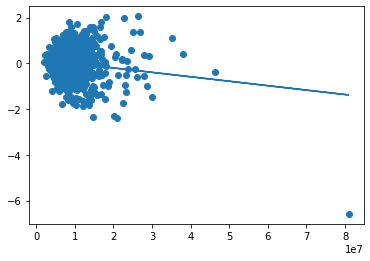

In [0]:
#Volume vs clos-op
x = data['Volume'].to_numpy()
y = data['clos-op'].to_numpy()
a, b = np.polyfit(x, y, 1)
plt.scatter(x, y)
plt.plot(x, a*x+b)
temp=[]
for i in x:
    temp.append(a*i+b)
temp=np.array(temp)
corr_matrix = np.corrcoef(y, temp)
corr = corr_matrix[0,1]
R_sq = corr**2
print("R2 score is:"+str(R_sq))

In [0]:
# we didnt really obtain any satisfying results with that our R2 score is poor and our scatter plot has no definitive pattern
#perhaps we should try to seperate the data by the top 50% and bottom 50% days for volume

In [0]:
top=data.loc[data['Volume']>7.093500e+06] #7.093500e+06 is the median for Volume
bot=data.loc[data['Volume']>7.093500e+06]

In [0]:
top.describe()

,Open,High,Low,Close,Volume,Adj Close,clos-op,hi-op,lo-op
count,629.000000,629.000000,629.000000,629.000000,6.290000e+02,629.000000,629.000000,629.000000,629.000000
mean,69.934770,70.514579,69.430986,69.980048,1.079549e+07,65.151285,0.045278,0.579809,-0.503784
std,7.010840,7.066018,6.975436,7.027573,5.166143e+06,7.057443,0.759684,0.468940,0.539924
min,56.389999,57.060001,56.299999,56.419998,7.099200e+06,50.363689,-6.580002,0.000000,-6.590001
25%,64.820000,65.709999,64.389999,64.940002,7.979200e+06,60.941328,-0.370003,0.209999,-0.680000
50%,70.580002,71.300003,70.230003,70.769997,9.394700e+06,65.883482,0.080002,0.470002,-0.370003
75%,74.139999,74.800003,73.750000,74.199997,1.183470e+07,69.714767,0.540001,0.839997,-0.139999
max,90.800003,90.970001,89.250000,90.470001,8.089810e+07,84.914216,2.059998,2.420002,0.000000


In [0]:
top.describe()

,Open,High,Low,Close,Volume,Adj Close,clos-op,hi-op,lo-op
count,629.000000,629.000000,629.000000,629.000000,6.290000e+02,629.000000,629.000000,629.000000,629.000000
mean,69.934770,70.514579,69.430986,69.980048,1.079549e+07,65.151285,0.045278,0.579809,-0.503784
std,7.010840,7.066018,6.975436,7.027573,5.166143e+06,7.057443,0.759684,0.468940,0.539924
min,56.389999,57.060001,56.299999,56.419998,7.099200e+06,50.363689,-6.580002,0.000000,-6.590001
25%,64.820000,65.709999,64.389999,64.940002,7.979200e+06,60.941328,-0.370003,0.209999,-0.680000
50%,70.580002,71.300003,70.230003,70.769997,9.394700e+06,65.883482,0.080002,0.470002,-0.370003
75%,74.139999,74.800003,73.750000,74.199997,1.183470e+07,69.714767,0.540001,0.839997,-0.139999
max,90.800003,90.970001,89.250000,90.470001,8.089810e+07,84.914216,2.059998,2.420002,0.000000


In [0]:
top.corr()

,Open,High,Low,Close,Volume,Adj Close,clos-op,hi-op,lo-op
Open,1.000000,0.997811,0.997032,0.994146,-0.226096,0.925729,-0.032127,0.084685,-0.103913
High,0.997811,1.000000,0.997008,0.997156,-0.211054,0.930057,0.015913,0.150389,-0.075809
Low,0.997032,0.997008,1.000000,0.997992,-0.260063,0.926924,0.030839,0.116947,-0.027037
Close,0.994146,0.997156,0.997992,1.000000,-0.249169,0.929848,0.076050,0.162325,-0.015501
Volume,-0.226096,-0.211054,-0.260063,-0.249169,1.000000,-0.213074,-0.218423,0.200045,-0.424006
Adj Close,0.925729,0.930057,0.926924,0.929848,-0.213074,1.000000,0.058494,0.174140,-0.045261
clos-op,-0.032127,0.015913,0.030839,0.076050,-0.218423,0.058494,1.000000,0.720090,0.815577
hi-op,0.084685,0.150389,0.116947,0.162325,0.200045,0.174140,0.720090,1.000000,0.411250
lo-op,-0.103913,-0.075809,-0.027037,-0.015501,-0.424006,-0.045261,0.815577,0.411250,1.000000


In [0]:
bot.corr()

,Open,High,Low,Close,Volume,Adj Close,clos-op,hi-op,lo-op
Open,1.000000,0.998771,0.998396,0.997091,-0.197831,0.927179,-0.122657,0.027625,-0.250933
High,0.998771,1.000000,0.998619,0.998838,-0.192236,0.928870,-0.083808,0.077134,-0.225828
Low,0.998396,0.998619,1.000000,0.998328,-0.210657,0.927726,-0.085531,0.056835,-0.195722
Close,0.997091,0.998838,0.998328,1.000000,-0.201335,0.928760,-0.046661,0.087485,-0.201718
Volume,-0.197831,-0.192236,-0.210657,-0.201335,1.000000,-0.155845,-0.028863,0.102466,-0.175065
Adj Close,0.927179,0.928870,0.927726,0.928760,-0.155845,1.000000,-0.058028,0.082685,-0.197890
clos-op,-0.122657,-0.083808,-0.085531,-0.046661,-0.028863,-0.058028,1.000000,0.777128,0.662135
hi-op,0.027625,0.077134,0.056835,0.087485,0.102466,0.082685,0.777128,1.000000,0.493205
lo-op,-0.250933,-0.225828,-0.195722,-0.201718,-0.175065,-0.197890,0.662135,0.493205,1.000000


In [0]:
#here we can observe that on high volume days there tends to be more profit but there is also a much higher standard deviation which makes sense considering more volume, indicates more movement
#Low volume days tend to be less profitable but still remain overall profitable
#Based off this we can generally expect that if we see a pattern of volatility increases we should buy as the price is likely to go up even if not by much necessarily

In [0]:
data['year'] = pd.DatetimeIndex(data['Date']).year
data['month'] = pd.DatetimeIndex(data['Date']).month
data['DOW'] = pd.DatetimeIndex(data['Date']).dayofweek
data['DOM'] = pd.DatetimeIndex(data['Date']).day
data.head()

,Date,Open,High,Low,Close,Volume,Adj Close,clos-op,hi-op,lo-op,year,month,DOW,DOM
0,2012-01-03,59.970001,61.060001,59.869999,60.330002,12668800,52.619235,0.360001,1.090000,-0.100002,2012,1,1,3
1,2012-01-04,60.209999,60.349998,59.470001,59.709999,9593300,52.078475,-0.500000,0.139999,-0.739998,2012,1,2,4
2,2012-01-05,59.349998,59.619999,58.369999,59.419998,12768200,51.825539,0.070000,0.270001,-0.979999,2012,1,3,5
3,2012-01-06,59.419998,59.450001,58.869999,59.000000,8069400,51.459220,-0.419998,0.030003,-0.549999,2012,1,4,6
4,2012-01-09,59.029999,59.549999,58.919998,59.180000,6679300,51.616215,0.150001,0.520000,-0.110001,2012,1,0,9


In [0]:
mon_df=data.groupby('month').mean()
mon_df= mon_df.sort_values(by=['month'])
mon_df.head(12)

,Open,High,Low,Close,Volume,Adj Close,clos-op,hi-op,lo-op,year,DOW,DOM
month,,,,,,,,,,,,
1,71.408119,71.970099,70.904257,71.448020,8.761851e+06,65.568879,0.039901,0.561980,-0.503862,2013.970297,2.148515,16.623762
2,71.191237,71.728454,70.693608,71.306804,9.764147e+06,65.496887,0.115567,0.537217,-0.497629,2014.000000,2.082474,14.742268
3,71.690467,72.202897,71.318785,71.777944,7.721836e+06,66.276340,0.087477,0.512430,-0.371682,2014.018692,1.962617,15.794393
4,72.957238,73.451239,72.521048,72.973619,7.956230e+06,67.443821,0.016381,0.494001,-0.436191,2014.009524,1.914286,15.571429
5,72.243491,72.717830,71.852925,72.309717,8.632351e+06,67.065579,0.066226,0.474340,-0.390566,2013.962264,2.141509,15.500000
6,72.510094,72.926227,72.121981,72.495377,8.303757e+06,67.438279,-0.014716,0.416133,-0.388113,2014.037736,1.981132,15.424528
7,74.357570,74.778785,74.004954,74.439719,6.841084e+06,69.108354,0.082149,0.421215,-0.352616,2013.981308,1.962617,16.514019
8,73.072091,73.517818,72.594727,73.029819,7.745198e+06,68.156929,-0.042272,0.445727,-0.477364,2013.990909,2.027273,16.009091
9,72.179608,72.602941,71.762843,72.184118,7.194451e+06,67.505601,0.004510,0.423334,-0.416764,2014.049020,2.068627,15.990196


In [0]:
year_df=data.groupby('year').mean()
year_df= year_df.sort_values(by=['year'])
year_df.head()

,Open,High,Low,Close,Volume,Adj Close,clos-op,hi-op,lo-op,month,DOW,DOM
year,,,,,,,,,,,,
2012,67.158680,67.602120,66.786520,67.215120,9.239015e+06,59.389349,0.056440,0.443440,-0.372160,6.500000,2.036000,15.776000
2013,75.264048,75.729405,74.843055,75.320516,6.951496e+06,68.147179,0.056468,0.465357,-0.420992,6.543651,2.015873,15.650794
2014,77.274524,77.740040,76.864405,77.327381,6.515612e+06,71.709712,0.052857,0.465516,-0.410119,6.551587,2.007937,15.761905
2015,72.569405,73.064167,72.034802,72.491111,9.040769e+06,68.831426,-0.078293,0.494762,-0.534603,6.567460,2.003968,15.750000
2016,69.481349,70.019643,69.023492,69.547063,9.371645e+06,68.054229,0.065714,0.538293,-0.457857,6.555556,2.035714,15.682540


In [0]:
DOW_df=data.groupby('DOW').mean()
DOW_df= DOW_df.sort_values(by=['DOW'])
DOW_df.head()

,Open,High,Low,Close,Volume,Adj Close,clos-op,hi-op,lo-op,year,month,DOM
DOW,,,,,,,,,,,,
0,72.353882,72.877975,72.008987,72.515232,7.524784e+06,67.344144,0.161350,0.524093,-0.344895,2013.991561,6.725738,15.641350
1,72.419225,72.880000,71.998992,72.448140,8.020720e+06,67.298594,0.028915,0.460775,-0.420233,2014.015504,6.523256,15.635659
2,72.382519,72.845737,71.869923,72.320271,8.294853e+06,67.197800,-0.062248,0.463217,-0.512597,2014.011628,6.519380,15.798450
3,72.189921,72.695218,71.723241,72.223399,8.688972e+06,67.082970,0.033478,0.505297,-0.466680,2014.003953,6.415020,15.679842
4,72.442103,72.899762,71.997262,72.443611,8.540842e+06,67.277126,0.001508,0.457659,-0.444841,2013.992063,6.547619,15.861111


In [0]:
DOM_df=data.groupby('DOM').mean()
DOM_df= DOM_df.sort_values(by=['DOM'])
DOM_df.head(31)

,Open,High,Low,Close,Volume,Adj Close,clos-op,hi-op,lo-op,year,month,DOW
DOM,,,,,,,,,,,,
1,71.857838,72.337297,71.364865,71.877837,8.596851e+06,66.842011,0.019999,0.479460,-0.492973,2014.081081,6.918919,2.027027
2,72.415122,72.929756,72.061707,72.557561,7.196649e+06,67.419241,0.142439,0.514634,-0.353415,2014.073171,6.634146,2.000000
3,72.233750,72.638000,71.749249,72.194751,7.632812e+06,66.836372,-0.038999,0.404251,-0.484500,2013.925000,6.600000,1.925000
4,71.516500,72.085000,71.201500,71.716750,8.014942e+06,66.536347,0.200251,0.568501,-0.315000,2014.025000,6.500000,1.975000
5,72.879048,73.354048,72.469762,72.986190,7.602538e+06,67.589060,0.107142,0.475000,-0.409286,2013.928571,6.571429,2.071429
6,73.080714,73.535476,72.648571,73.163333,7.682217e+06,67.820496,0.082619,0.454762,-0.432143,2013.976190,6.333333,2.047619
7,72.302439,72.822927,71.857317,72.407073,8.452598e+06,67.255175,0.104634,0.520488,-0.445122,2014.024390,6.414634,2.024390
8,72.525000,73.132143,72.126667,72.731190,8.338533e+06,67.735399,0.206190,0.607143,-0.398333,2014.119048,6.404762,2.023810
9,72.542558,73.007209,72.068837,72.502791,7.492481e+06,67.355793,-0.039767,0.464651,-0.473720,2014.000000,6.558140,1.906977


Out[183]: [<matplotlib.lines.Line2D at 0x7f2cfb98f280>]

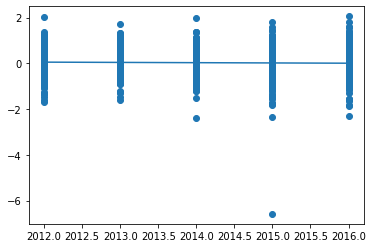

In [0]:
#year vs clos-op
x = data['year'].to_numpy()
y = data['clos-op'].to_numpy()
plt.scatter(x, y)

Out[184]: [<matplotlib.lines.Line2D at 0x7f2cfbac3280>]

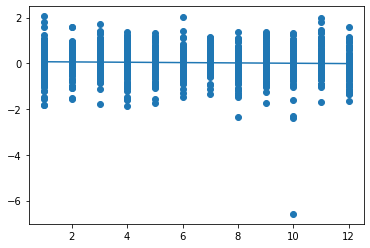

In [0]:
#month vs clos-op
x = data['month'].to_numpy()
y = data['clos-op'].to_numpy()
plt.scatter(x, y)

Out[185]: [<matplotlib.lines.Line2D at 0x7f2cfbcac3d0>]

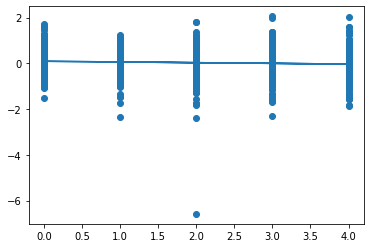

In [0]:
#DOW vs clos-op
x = data['DOW'].to_numpy()
y = data['clos-op'].to_numpy()
plt.scatter(x, y)

Out[186]: [<matplotlib.lines.Line2D at 0x7f2cfbf385b0>]

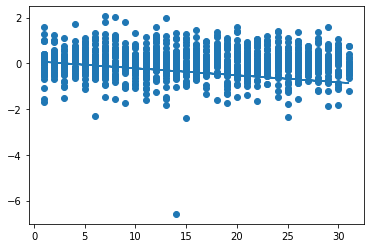

In [0]:
#DOM vs clos-op
x = data['DOM'].to_numpy()
y = data['clos-op'].to_numpy()
plt.scatter(x, y)

In [0]:
data.groupby(['year']).sum()['Volume']

Out[194]: year
2012    2.309754e+09
2013    1.751777e+09
2014    1.641934e+09
2015    2.278274e+09
2016    2.361655e+09
Name: Volume, dtype: float64